In [ ]:
pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:
    # Set DataFrame as the Stock Ticker
    globals()[stock] =yf.download(stock, start=start,end=end, progress=False)

In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "AMAZON","MICROSOFT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-01-05,144.690002,146.589996,144.529999,145.240005,145.240005,45124800,MICROSOFT
2024-01-08,146.740005,149.399994,146.149994,149.100006,149.100006,46757100,MICROSOFT
2024-01-09,148.330002,151.710007,148.210007,151.369995,151.369995,43812600,MICROSOFT
2024-01-10,152.059998,154.419998,151.880005,153.729996,153.729996,44421800,MICROSOFT
2024-01-11,155.039993,157.169998,153.119995,155.179993,155.179993,49072700,MICROSOFT
2024-01-12,155.389999,156.199997,154.009995,154.619995,154.619995,40460300,MICROSOFT
2024-01-16,153.529999,154.990005,152.149994,153.160004,153.160004,41384600,MICROSOFT
2024-01-17,151.490005,152.149994,149.910004,151.710007,151.710007,34953400,MICROSOFT
2024-01-18,152.770004,153.779999,151.820007,153.500000,153.500000,37850200,MICROSOFT


In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,174.850837,176.440797,173.598725,175.179682,174.788376,5.849635e+07
std,15.024444,14.762392,14.963640,14.777304,14.951211,1.734696e+07
min,135.279999,138.020004,134.220001,137.869995,137.103653,2.404830e+07
25%,165.139999,166.644997,164.400002,165.709999,165.040512,4.751440e+07
50%,176.960007,178.990005,175.820007,177.300003,176.996811,5.468690e+07
75%,187.424995,188.645004,185.750000,187.759995,187.499641,6.546495e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.543573e+08


In [ ]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-01-20 to 2024-01-19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


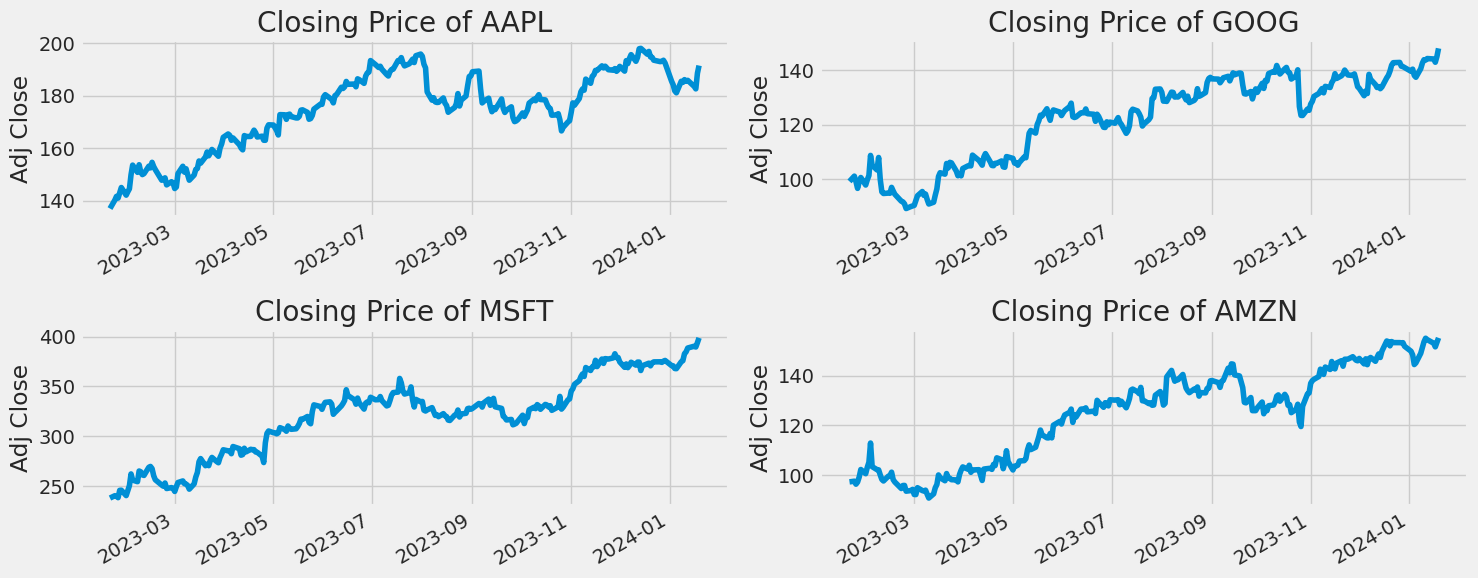

In [ ]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

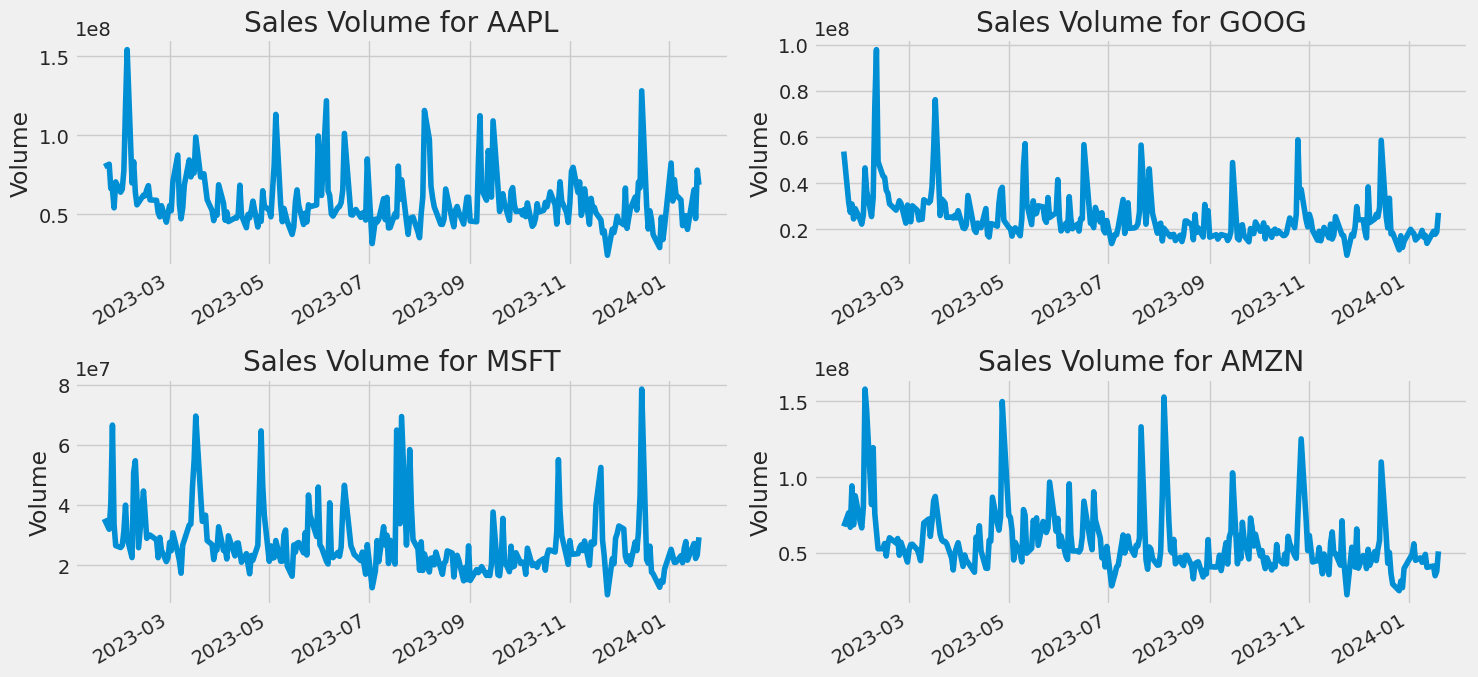

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

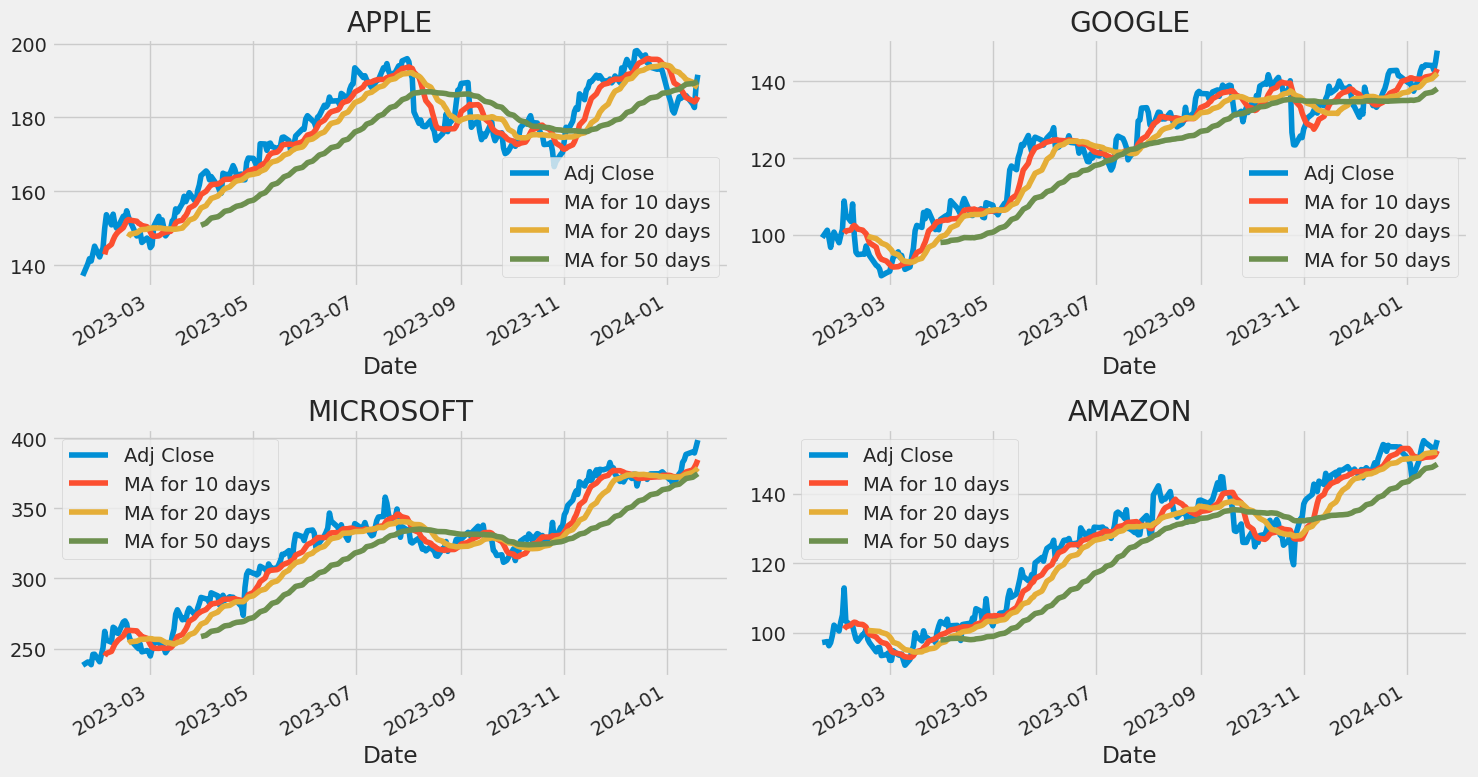

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

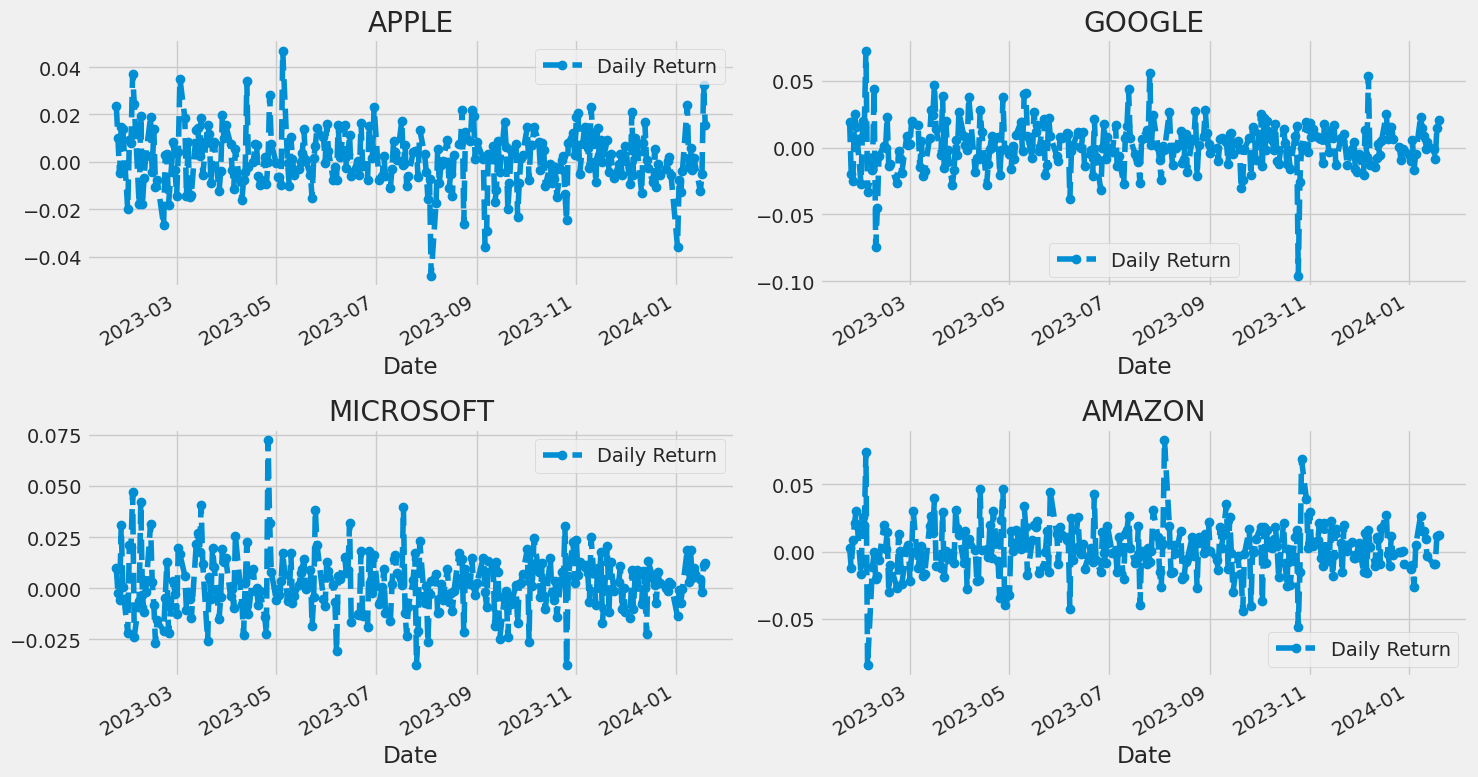

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

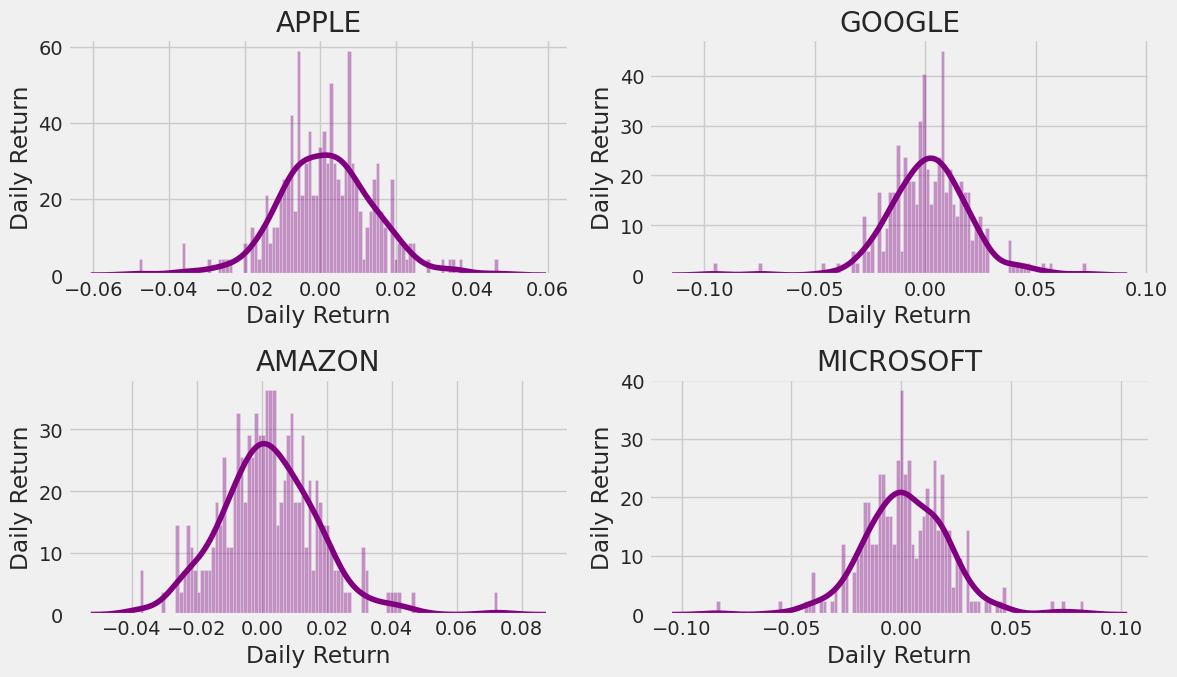

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start, end,progress=False)['Adj Close']


closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-20,137.103653,97.250000,99.279999,238.108719
2023-01-23,140.325653,97.519997,101.209999,240.447968
2023-01-24,141.737762,96.320000,99.209999,239.912704
2023-01-25,141.071472,97.180000,96.730003,238.495285
2023-01-26,143.159821,99.220001,99.160004,245.820328


In [ ]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-20,NaN,NaN,NaN,NaN
2023-01-23,0.023500,0.002776,0.019440,0.009824
2023-01-24,0.010063,-0.012305,-0.019761,-0.002226
2023-01-25,-0.004701,0.008929,-0.024997,-0.005908
2023-01-26,0.014803,0.020992,0.025121,0.030714


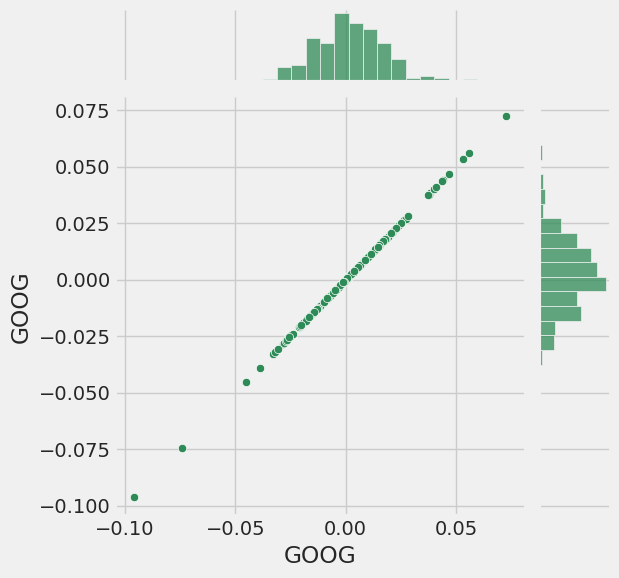

In [ ]:
#Comparing Google to itself should show a perfectly linear relationship
import seaborn as sns
# Assuming 'GOOG' is the column in tech_rets DataFrame
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')


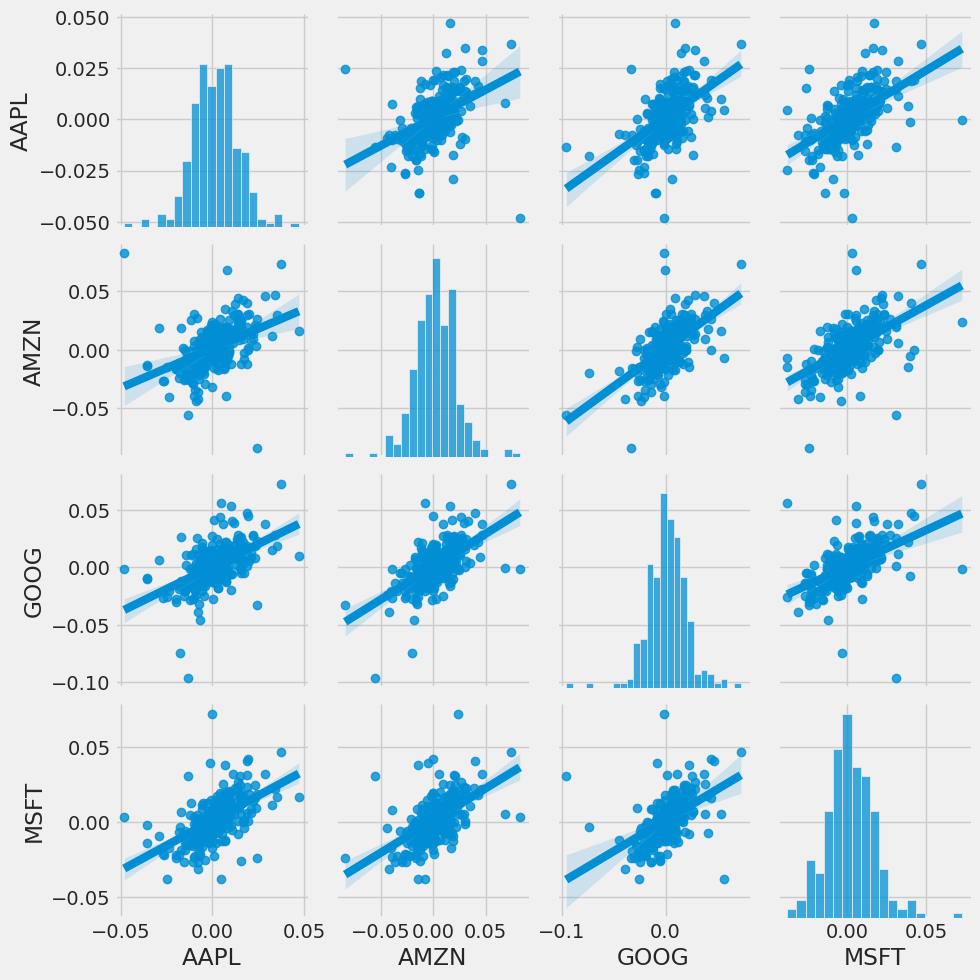

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')


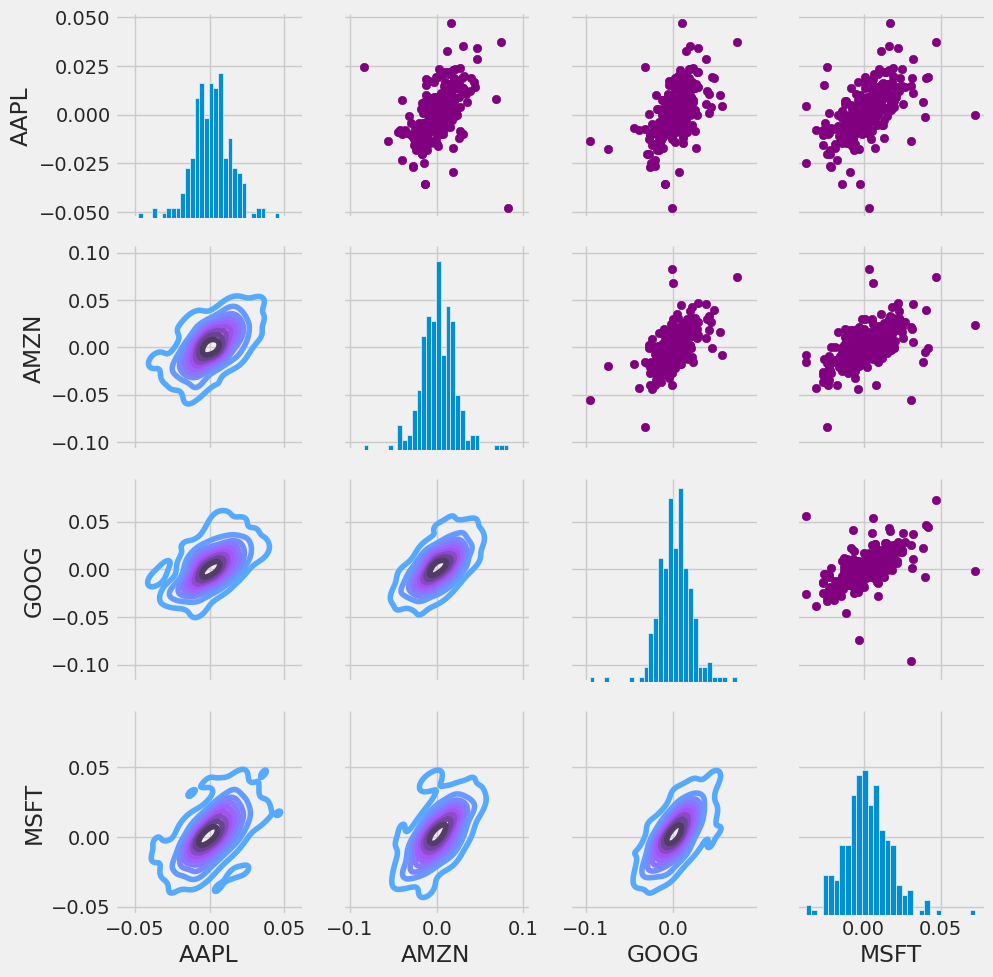

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

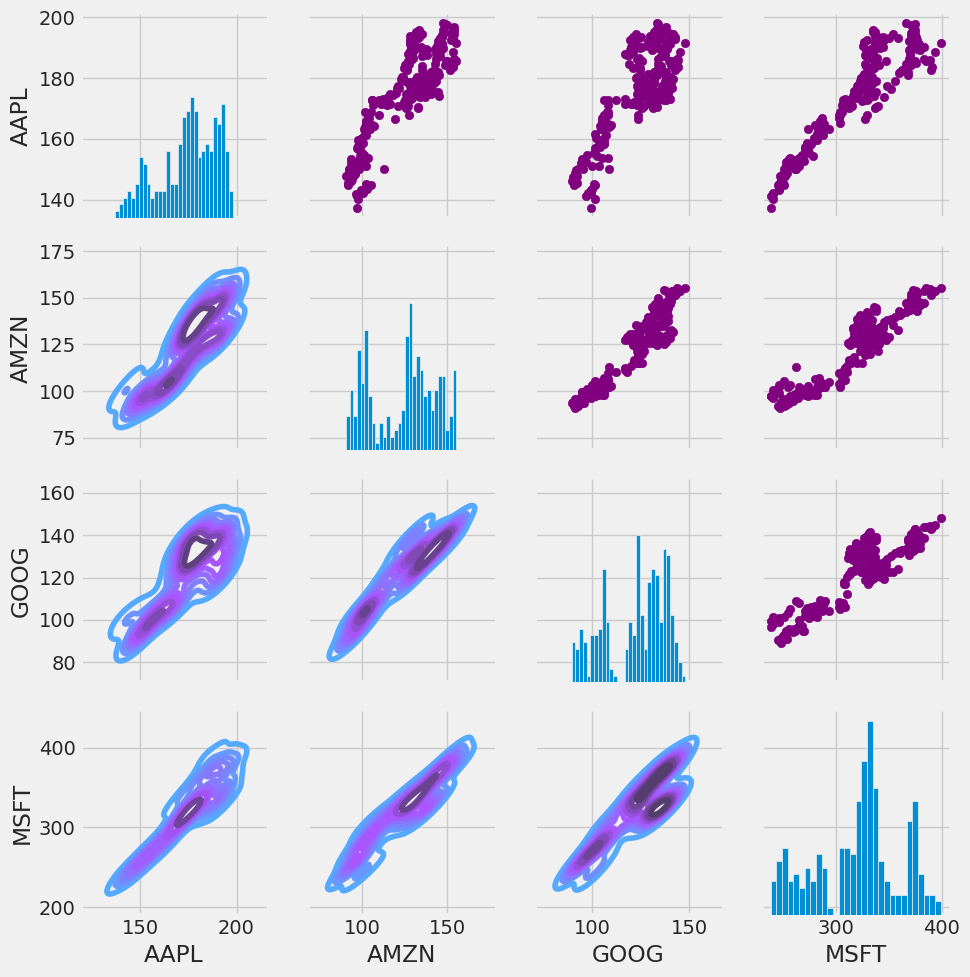

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<Axes: >

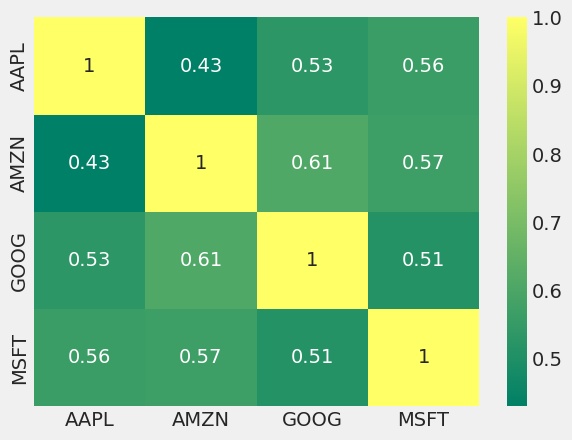

In [ ]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<Axes: >

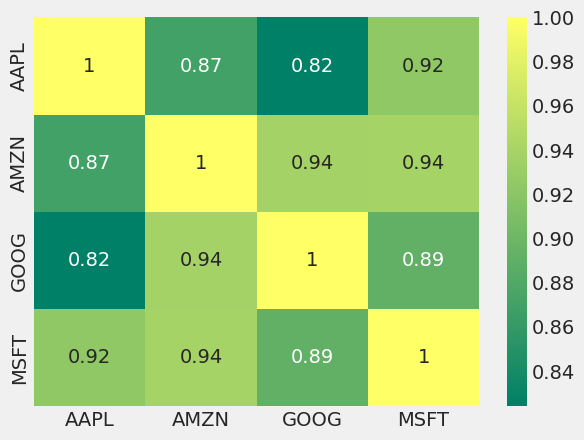

In [ ]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

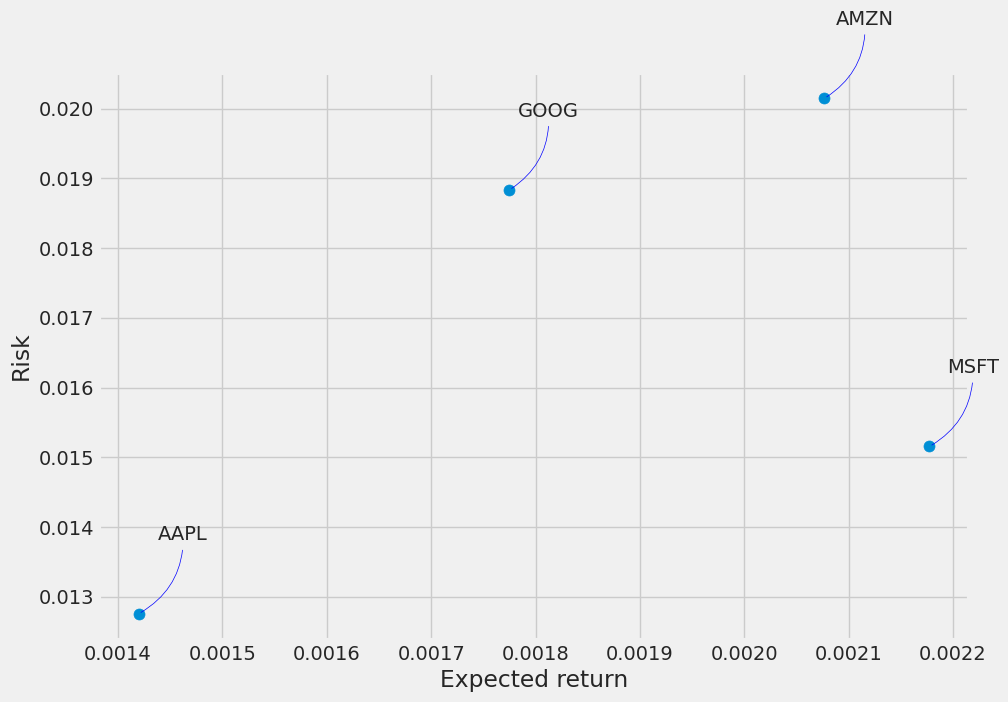

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
# Get the stock quote
df = yf.download('AMZN', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.794500,8.974000,8.777500,8.951500,8.951500,102216000
2012-01-04,8.960500,9.025000,8.803500,8.875500,8.875500,84104000
2012-01-05,8.797000,8.912500,8.702500,8.880500,8.880500,76182000
2012-01-06,8.903500,9.232500,8.875000,9.130500,9.130500,140168000
2012-01-09,9.138000,9.218500,8.850000,8.928000,8.928000,101138000
...,...,...,...,...,...,...
2024-01-12,155.389999,156.199997,154.009995,154.619995,154.619995,40460300
2024-01-16,153.529999,154.990005,152.149994,153.160004,153.160004,41384600
2024-01-17,151.490005,152.149994,149.910004,151.710007,151.710007,34953400


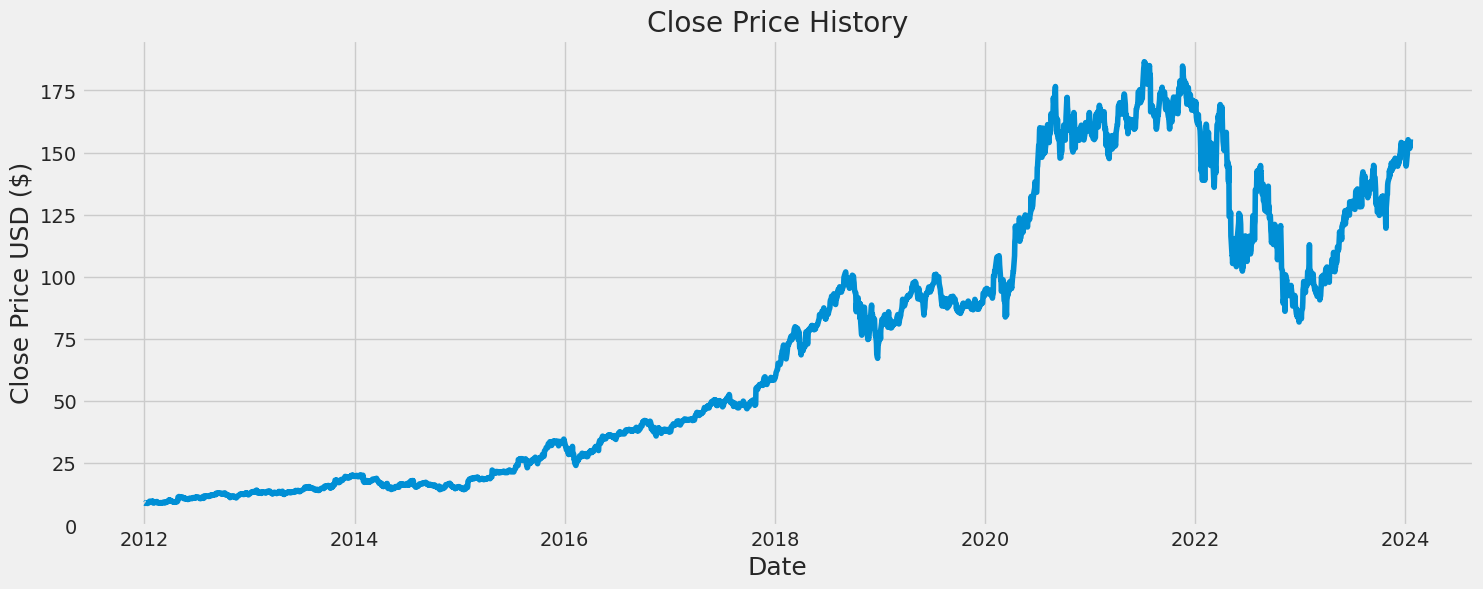

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2880

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[8.71892048e-04],
       [4.44381751e-04],
       [4.72507993e-04],
       ...,
       [8.03905578e-01],
       [8.13974504e-01],
       [8.24324704e-01]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00087189, 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070032, 0.0016116 ,
       0.00379977, 0.00520886, 0.00421884, 0.00285756, 0.0031135 ,
       0.00333851, 0.00489104, 0.00546762, 0.00456197, 0.00520605,
       0.00099283, 0.00162847, 0.00330476, 0.00202785, 0.00232318,
       0.00268599, 0.00254536, 0.00270287, 0.00440447, 0.0043229 ,
       0.00240193, 0.00112502, 0.00184785, 0.00178035, 0.00130784,
       0.00083252, 0.00090002, 0.00073127, 0.00221348, 0.00105752,
       0.00115596, 0.00094783, 0.00121783, 0.00145128, 0.00220505,
       0.00329351, 0.00235973, 0.00209817, 0.00243567, 0.00178035,
       0.00239068, 0.00256505, 0.00269724, 0.0046126 , 0.00444384,
       0.00463228, 0.0053748 , 0.00757704, 0.00829986, 0.00709609])]
[0.008066421706034416]

[array([0.00087189, 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070032, 0.0016116 ,
       0.00379977, 0.00520886, 0.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2820/2820 [==============================] - 172s 60ms/step - loss: 0.0013


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 31ms/step


5.040663974436928

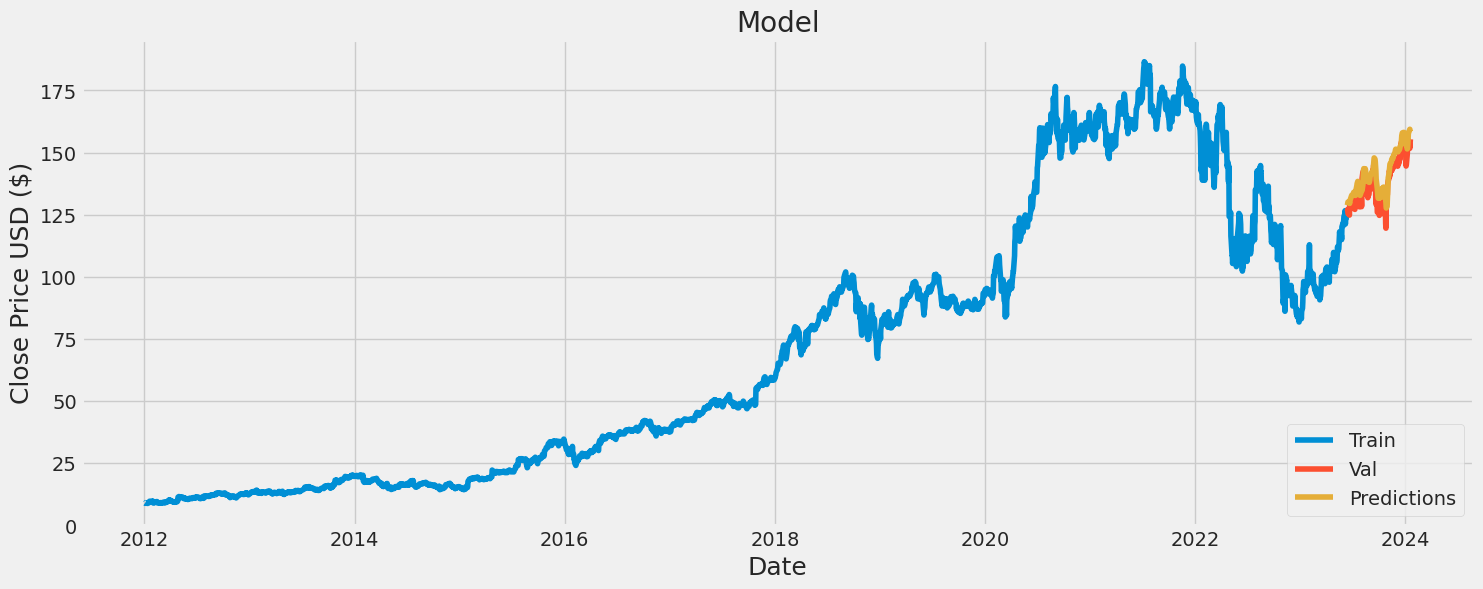

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# ... (Previous code remains unchanged)
future_days = 30
 # or any other number of days you want to predict

# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
x_test, y_test = [], dataset[training_data_len:, :]

# Initialize x_test with the last 60 days of the existing data
x_test = [test_data[-60:]]

# Predict future values
predictions = []

for i in range(future_days):
    pred = model.predict(np.reshape(x_test[-1], (1, 60, 1)))
    predictions.append(pred[0, 0])
    x_test.append(np.concatenate((x_test[-1][1:], pred[0, 0].reshape(1, -1))))

# Invert the scaling
predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

# Create a DataFrame for the next 30 days' predictions
prediction_dates = pd.date_range(df.index[-1] + pd.DateOffset(1), periods=future_days)
prediction_df = pd.DataFrame({'Date': prediction_dates, 'Predicted Close Price': predictions.flatten()})

# Display the table



1/1 [==============================] - 0s 35ms/step


In [ ]:
prediction_df

,Date,Predicted Close Price
0,2024-01-20,158.773834
1,2024-01-21,160.323349
2,2024-01-22,162.250656
3,2024-01-23,164.319626
4,2024-01-24,166.427521
5,2024-01-25,168.525665
6,2024-01-26,170.589981
7,2024-01-27,172.609299
8,2024-01-28,174.580429
9,2024-01-29,176.505188


In [ ]:
valid.head()


,Close,Predictions
Date,,
2023-06-14,126.419998,128.826340
2023-06-15,127.110001,129.487656
2023-06-16,125.489998,130.109177
2023-06-20,125.779999,130.085876
2023-06-21,124.830002,129.948959
